## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

# setting the column width to none to display full text of the comment
pd.set_option('display.max_colwidth', None)

# setting up GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Importing Data


In [2]:
data = pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
58447,9c875d7527795ed8,REDIRECT Talk:Ministry of Health (Argentina),0,0,0,0,0,0
86899,e86b143fdb70fe2b,I don't know what sort of account I am using Domer but Black Kite seems to understand that BT creates multiple numbers. Anyway since I registered I haven't been using IP numbers despite your paranoid accusations.,0,0,0,0,0,0
149391,5ba113943acb7a0e,"""\n\n Assessments \n\nThank you for adding template tags on WikiProject Environment articles. Try consider Outriggr's tool to assess article class. After that, I will reward you the Environmental Barnstar. If you have questions on how to assign class of articles, please don't hesitate to contact me. Talk page """,0,0,0,0,0,0
115337,68ca24f2712fbfac,"""\n\n Josip Šimunić \n\nYou placed the following link as the reference for the player being of Bosnian-Croat heritage. Unfortunately I cannot verify the page myself. Could you put a direct translation of the original and the english here (or on the article talk page) for the relevant statement.\n\nThanks,\n\n """,0,0,0,0,0,0
19736,34231003450e8369,"Don't display the plot!\nI deleted the section because it is spoiling it for people who haven't read it. Who ever created that plot section in the first place is a mean person, Because you are spoiling it for everyone who hasn't read it. Don't restore the section, Because it is not fair for those who read it.",0,0,0,0,0,0


Lets look at some of the toxic comments


In [5]:
data[data['toxic'] == 1].sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
70447,bc7aa2cc0b202b7a,@ Fine! Just get me out of here and let me be with Anime News Network and some of IMDb where I can find better cool guys and not ones that picky and snobbish like you. New Jersey sucks!,1,0,1,0,0,0
34096,5af06d69dbdcd5a4,"""\n\nVicious\nWhy are you so vicious! I was never rude, but to be quite honest you are coming across like an arrogant bitch! How dare you call me selfish! You dont know me from Adam. You are saying I shouldn't talk to you like """"that"""" but let me tell you: DON'T YOU DARE SPEAK TO ME THE WAY YOU DID! I STILL MAINTAIN THAT YOUR WRESTLING KNOWLEDGE IS MINUTE COMPARED TO THE WEALTH OF KNOWLEDGE I HAVE. So you can stay here and act like you are the most accomplished person in Wrestling, but from the edits you have made I personally think you know very close to NOTHING!\n(Just as an example...don't you think Shane's wife's page should be merged with his??? She is not that accomplished as a celebrity?) Oh and I find it rather disturbing that you can't construct a sentence without the word """"bloody"""" get a vocabulary! """,1,0,0,0,0,0
132785,c6709dc53840b5a3,again again again \n\nthis is not going to stop......hmmmm a personal attack let me think......you are a big poo poo face and smell like a frog\n\n star wars sucks \n\npeoplw with no lives like that gay stuff,1,0,0,0,1,1
31737,544d570a9dc705d2,"message on daedalus' page \n\nDaedalus is nothing but a filthy n!gger and a cyberstalker who sits in his mommy's basement and who fails - yet again - at trying to ban me and stop me from getting my lulz on. I have access to THOUSANDS of IPs and have many 25 sleeper accounts, so u fail u wiki-police homos. plz feel free to suck my d!ck u n!gger f@ggot. You==========> fail. anyways, u have to be watchful everywhere - i can pick and chose my announcements at will, and still edit via my sleeper accounts from IPs all across the world. u wont no when or where i will appear. my lulz is 4ever u n!gger f@gget.\nStop cyberstalking people u freak Daedalus. go back to hiding in mommy's basement and playing Call of Duty or whatever gay thing u do since it is obvious that u are unemployeed cuz u spend all day on wikipedia looking like the lozer u are. Moar lulz for me!!!! Horray for me!!! Im kool and ur a fool!!!! I shall surface again and make myself known in a month or two. HEY EVERYBODY - Daedalus is a n!gger and a f@ggot!!!!!!!!!! Look at the n!gger f@ggot! You===========> fail.",1,0,0,0,0,0
133886,cc4105cf4efe393d,"""\n\nWhat random comments! Argumentum ad hominem is a logical fallacy, not a fancy term for an insult. I think you may have got confused by all that Latin. I presume you consider it crackers' talk. Don't bother reading the article; you won't understand it.\n\nSelf-respect? You seem to have problems with the English language there too; you mean """"respect"""". I'm fine; it's you and all other racist scum that I don't respect. You are the main reason excellent editors leave. — """,1,0,0,0,0,0


## Preprocessing


In [6]:
from tensorflow.keras.layers import TextVectorization

Splitting into X and y 

In [7]:
X = data['comment_text']
y = data[data.columns[2:]].values

Number of words in our vocabulary


In [8]:
MAX_FEATURES = 200000

In [9]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES, output_sequence_length = 1800, output_mode = 'int')

In [10]:
vectorizer.adapt(X.values)

In [11]:
print(vectorizer.get_vocabulary()[:100])

['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'you', 'i', 'is', 'that', 'in', 'it', 'for', 'this', 'not', 'on', 'be', 'as', 'have', 'are', 'your', 'with', 'if', 'article', 'was', 'or', 'but', 'page', 'my', 'an', 'from', 'by', 'do', 'at', 'about', 'me', 'so', 'wikipedia', 'can', 'what', 'there', 'all', 'has', 'will', 'talk', 'please', 'would', 'its', 'no', 'one', 'just', 'like', 'they', 'he', 'dont', 'which', 'any', 'been', 'should', 'more', 'we', 'some', 'other', 'who', 'see', 'here', 'also', 'his', 'think', 'im', 'because', 'know', 'how', 'am', 'people', 'why', 'edit', 'articles', 'only', 'out', 'up', 'when', 'were', 'use', 'then', 'may', 'time', 'did', 'them', 'now', 'being', 'their', 'than', 'thanks', 'even', 'get', 'make', 'good', 'had']


In [12]:
print(vectorizer("Hello, How are you?")[:5])

tf.Tensor([288  73  20   7   0], shape=(5,), dtype=int64)


In [13]:
%%time
vectorized_text = vectorizer(X.values)

2023-02-21 05:31:57.885101: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


CPU times: user 2.82 s, sys: 1.9 s, total: 4.73 s
Wall time: 4.71 s


In [14]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

data pipeline for tensorflow

In [15]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [16]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

2023-02-21 05:31:59.647916: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


In [17]:
print(batch_X.shape, batch_y.shape)

(16, 1800) (16, 6)


## train, val, test


In [18]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [19]:
print(f'Training Examples: {len(train)}, Validation Examples: {len(val)}, Test Examples: {len(test)}')

Training Examples: 6981, Validation Examples: 1994, Test Examples: 997


## Neural Network


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [21]:
def build_model():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(MAX_FEATURES+1, 32))
    # Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(32, activation= 'tanh')))
    # Feature extractor dense layers
    model.add(Dense(128, activation= 'relu'))
    model.add(Dense(256, activation= 'relu'))
    model.add(Dense(128, activation= 'relu'))
    # final layer with multiple outputs
    model.add(Dense(6, activation= 'sigmoid'))
    # Compiling the model
    model.compile(loss= 'BinaryCrossentropy', optimizer= 'Adam')
    
    return model

In [22]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [23]:
%%time
# Training the model
history = model.fit(train, epochs = 7, validation_data= val)

2023-02-21 05:32:02.857674: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


Epoch 1/7
6981/6981 [==============================] - ETA: 0s - loss: 0.0642

2023-02-21 05:41:19.141021: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


6981/6981 [==============================] - 630s 89ms/step - loss: 0.0642 - val_loss: 0.0465
Epoch 2/7
6981/6981 [==============================] - 627s 90ms/step - loss: 0.0469 - val_loss: 0.0406
Epoch 3/7
6981/6981 [==============================] - 630s 90ms/step - loss: 0.0410 - val_loss: 0.0366
Epoch 4/7
6981/6981 [==============================] - 641s 92ms/step - loss: 0.0370 - val_loss: 0.0340
Epoch 5/7
6981/6981 [==============================] - 650s 93ms/step - loss: 0.0340 - val_loss: 0.0304
Epoch 6/7
6981/6981 [==============================] - 645s 92ms/step - loss: 0.0306 - val_loss: 0.0288
Epoch 7/7
6981/6981 [==============================] - 654s 94ms/step - loss: 0.0278 - val_loss: 0.0242
CPU times: user 1h 14min 41s, sys: 1min 18s, total: 1h 16min
Wall time: 1h 16min 11s


In [24]:
history.history

{'loss': [0.06418641656637192,
  0.04687969386577606,
  0.041041575372219086,
  0.03701698035001755,
  0.03403245657682419,
  0.030606398358941078,
  0.02778984233736992],
 'val_loss': [0.04647146165370941,
  0.040614694356918335,
  0.03657395392656326,
  0.03403576835989952,
  0.030446959659457207,
  0.0288444384932518,
  0.02415059693157673]}

<Figure size 800x500 with 0 Axes>

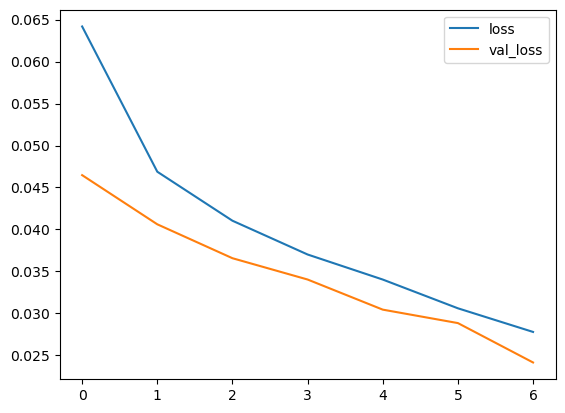

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
pd.DataFrame(history.history).plot()
plt.show()

## Making Predictions


In [26]:
input_text = vectorizer("Stupid, idiot!")

In [27]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 1s 798ms/step


In [28]:
(res > 0.5).astype('int')

array([[1, 0, 1, 0, 1, 0]])

testing on the test set


In [29]:
batch = test.as_numpy_iterator().next()

2023-02-21 06:49:03.840570: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2297822400 exceeds 10% of free system memory.


In [30]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [31]:
batch_y

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [32]:
(model.predict(batch_X) > 0.5).astype('int')

1/1 [==============================] - 0s 72ms/step


array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## Model Evaluation


In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [34]:
prec = Precision()
rec = Recall()
acc = CategoricalAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    prec.update_state(y_true, yhat)
    rec.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 78ms/step


In [36]:
print(f"Precision: {prec.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.8745226263999939, Recall: 0.8836824893951416, Accuracy: 0.5245737433433533


In [37]:
print(f'''Precision shows that out of 100 predicted positives, {round(prec.result().numpy()*100)} were correct.  
Recall shows that out of 100 actual positives, {round(rec.result().numpy()*100)} are correctly predicted.  
Accuracy shows that our model is {round(acc.result().numpy()*100)}% accurate and has an error of {100 - (round(acc.result().numpy()*100))}%''')

Precision shows that out of 100 predicted positives, 87 were correct.  
Recall shows that out of 100 actual positives, 88 are correctly predicted.  
Accuracy shows that our model is 52% accurate and has an error of 48%


## saving the model weights


In [38]:
model.save('hate_model.h5')

## Loading and testing the saved model


In [39]:
loaded_model = tf.keras.models.load_model('hate_model.h5')

In [40]:
# Testing the loaded Model
input_str = vectorizer('hey there how are you?')
res = loaded_model.predict(np.expand_dims(input_str, 0))

1/1 [==============================] - 1s 691ms/step


In [41]:
print(data.columns[2:])
print(res)

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')
[[2.3662703e-02 8.9048292e-08 2.6710299e-03 4.8357516e-04 2.4689047e-03
  6.5556698e-04]]


## Creating a model interface using gradio

In [42]:
!pip install gradio jinja2

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=e13e8fcc3df7b0004393500d99c0b964c9b2f73690790b980b5eaec7de3fe5de
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=4f6b069f4fb45e8ca1781969367c374385c71f2336a5348edb7a3b665ffeb856
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534f

In [43]:
import gradio as gr

Lets Create a function to display results


In [44]:
def predict_comment_hate(comment):
    comment_vectorized = vectorizer(comment)
    results = model.predict(np.expand_dims(comment_vectorized,0))
    
    text = ''
    for idx, col in enumerate(data.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
        
    return text

In [45]:
print(predict_comment_hate("i will hurt you"))

1/1 [==============================] - 0s 69ms/step
toxic: True
severe_toxic: False
obscene: False
threat: False
insult: False
identity_hate: False



In [46]:
interface = gr.Interface(fn= predict_comment_hate, inputs= gr.inputs.Textbox(lines= 2, placeholder= 'Enter the Comment'), outputs = 'text')

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:28: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [47]:
interface.launch(share= True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://718032cd55f45f7775.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
